                                                    Wrocław 16.12.2022
                                                    dr. inż. Agata Migalska

# Metody analizy i eksploatacji


### Wojciech Serewis 244117
### Patryk Marciniak 248978

## Milestone 3

### 1. Opis problemu
   
   W niniejszym kamieniu milowym projektu postanowiono przeprowadzić klasyfikację zmiennej 'Default', która w wykorzystywanym zbiorze danych odpowiada za to, czy dany pożyczkobiorca będzie w stanie spłacić pożyczkę. Zmienna przyjmuje wartość '1', dana osoba nie spłaci pożyczki oraz '0' w przeciwnym wypadku.
   Klasyfikacja zostanie przeprowadzona na podstawie zmiennych:
- Yearly_Income - Całkowity roczny przychód pożyczkobiorcy
- Lend_Amount - Całkowita kwota finansowana dla pożyczkobiorcy
- Upaid_Amount - Niespłacone saldo na karcie kredytowej
- GGGrade - Ocena nadana przez Grant Group Funding
- Experience - Łączne doświadczenie zawodowe pożyczkobiorcy w latach
- Home_Status - Status zamieszkania pożyczkobiorcy
- Asst_reg - Wartość wszystkich aktywów zarejestrowanych na nazwisko pożyczkobiorcy

Zmienne te zostały wybrane ze względu na ich znaczenie w kontekście stabilności finansowej pożyczkobiorcy, 'Yearly_Income' bezpośrednio wpływa na to, czy dana osoba będzie w stanie spłacić pożyczkę, a 'Lend_Amount' ma wpływ na decyzję banku, ze względu na to, czy jest on w stanie udzielić takiej ilości pieniędzy danej osobie. Podobnie 'GGGrade' jest metryką używaną przez organizację Grant Group Funding, do wstępnej analizy sytuacji pożyczkobiorcy. Zmiennymi, które nie bezpośrednio mają wpływ na decyzję, ale mimo to mogą być uznane za znaczące są 'Unpaid_Amount', 'Experience', 'Home Status' oraz 'Asst_Reg'. Sugerują one, w jakiej sytuacji finansowej znajduje się dana osoba, pożyczkobiorca, który ma własny dom, nieduże niespłacone saldo na karcie kredytowej, czy spore doświadczenie zawodowe powinien być atrakcyjnieszym klientem, ze względu na jego wypłacalność.

### 2. Rozwiązanie problemu

W celu rozwiązania postawionego problemu, jakim jest klasyfikacja zmiennej 'Default'(informacja o zatwierdzeniu pożyczki), na podstawie zmiennych 'Yearly_Income', 'Lend_Amount', 'Unpaid_Amount', 'GGGrade', 'Experience', 'Home_Status' oraz 'Asst_Reg', postanowiono wykorzystać perceptron wielowarstwowy, natomiast do walidacji zaimplementowanego modelu użyto tablicy pomyłek, a także parametrów Precyzji, Zwrotu oraz wskaźnika F1.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import metrics

In [3]:
df = pd.read_csv('data.csv')
df

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,95074,421802,II,>10yrs,Vfied,633600.00,MORTGAGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,RENT,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,RENT,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,RENT,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,RENT,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87495,120884,4535984,II,>10yrs,Not Vfied,75680.00,RENT,0,0,Engineer Support II,...,whole,MI,12,32702.0,3 years,10012.05,debt consolidation,I,0.0,0
87496,33259,2624710,IV,3yrs,Source Verified,90423.52,RENT,0,0,Dental Hygienist,...,whole,MA,23,32204.0,5 years,24921.54,debt consolidation,I,0.0,0
87497,102153,5966919,II,>10yrs,Source Verified,91520.00,MORTGAGE,0,0,Interface Coordinator,...,fully paid,CT,8,29050.0,3 years,14517.90,debt consolidation,I,0.0,0
87498,115343,2630667,III,1yrs,Source Verified,61600.00,MORTGAGE,0,0,PARTS CLERK,...,whole,PA,11,24900.0,3 years,8454.24,debt consolidation,I,0.0,0


### 3. Wczytanie i obróbka danych
Po wczytaniu danych zauważyć można, że niektóre rekordy nie zawierają danych w pojedynczych kolumnach. Z tego powodu postanowiono w pierwszej kolejności usunąć wszystkie wiersze, które zawierają nieprawidłowe dane w którejkolwiek kolumnie.

In [4]:
#Delete non valid rows
indices_to_delete = df[df.isna().any(axis=1)].index
df = df.drop(indices_to_delete)

print(f'N of rows: {len(df)}')
print(f'N of rows to delete: {len(indices_to_delete)}')
print(f'N of rows after deletion: {len(df)}')

N of rows: 68505
N of rows to delete: 18995
N of rows after deletion: 68505


Następnie postanowiono usystematycznić nazwy w kolumnie 'States', co ma pomóc w daleszej analizie. W pierwszej kolejności wykryto wszystkie nazwy stanów, których długość jest większa od 2, a następnie podmieniono je na odpowiadające im skróty.

In [5]:
# Making the 'States' column consistent
old_state_list = [state for state in df.State.unique()]

new_state_names = ['CA', 'FL', 'MD', 'NJ', 'NY', 'OH']

state_names_to_change = [state for state in df.State.unique() if len(state) > 2]
sorted_sntc = sorted(state_names_to_change)

for i, state in enumerate(sorted_sntc):
    df.loc[df['State'] == state, ['State']] = new_state_names[i]

new_state_list = [state for state in df.State.unique()]

print('State list before:')
print(old_state_list)
print('State list after:')
print(new_state_list)

State list before:
['California', 'NC', 'Florida', 'NewJersey', 'LA', 'TX', 'MI', 'AR', 'MT', 'CO', 'Ohio', 'MN', 'GA', 'Newyork', 'Maryland', 'AL', 'PA', 'AZ', 'UT', 'MA', 'VA', 'IL', 'WI', 'HI', 'RI', 'TN', 'WA', 'VT', 'NV', 'OK', 'IN', 'AK', 'SC', 'CT', 'NE', 'NH', 'OR', 'MO', 'WV', 'MS', 'KY', 'KS', 'DE', 'NM', 'SD', 'DC', 'WY', 'ND', 'ME']
State list after:
['CA', 'NC', 'FL', 'NJ', 'LA', 'TX', 'MI', 'AR', 'MT', 'CO', 'OH', 'MN', 'GA', 'NY', 'MD', 'AL', 'PA', 'AZ', 'UT', 'MA', 'VA', 'IL', 'WI', 'HI', 'RI', 'TN', 'WA', 'VT', 'NV', 'OK', 'IN', 'AK', 'SC', 'CT', 'NE', 'NH', 'OR', 'MO', 'WV', 'MS', 'KY', 'KS', 'DE', 'NM', 'SD', 'DC', 'WY', 'ND', 'ME']


### 4. Sprawdzenie wartości odstających

W kolejnym kroku postanowiono zbadać wartości odstające, na wykresie przedstawiającym zależność rocznego przychodu od pożyczanej kwoty. Konkretniej postanowiono skupić się na punktach, które znajdują się pod krzywą widoczną na poniższym wykresie.

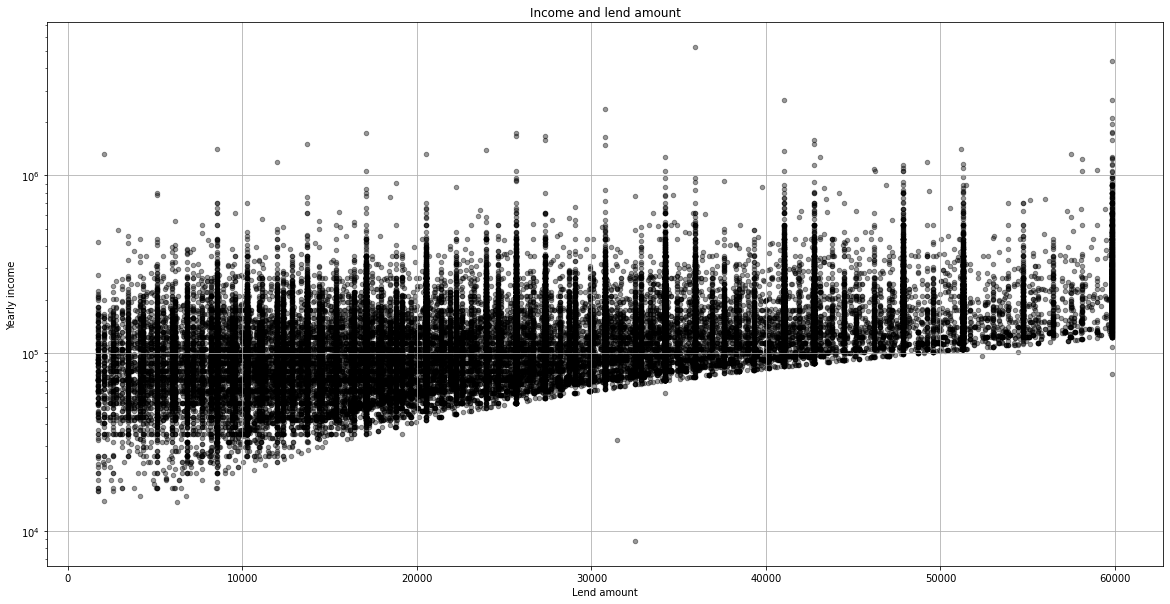

In [6]:
ax = df.plot.scatter(x='Lend_Amount',
                     y='Yearly_Income',
                     figsize=(20, 10),
                     xlabel='Lend amount',
                     ylabel='Yearly income',
                     title='Income and lend amount',
                     alpha=0.4,
                     color='black',
                     grid=True
                     )
ax.set_yscale('log')

Jako że oś _Y_ powyższego wykresu jest w skali logarytmicznej, postanowiono wygenerować wykres, którego oś _Y_ będzie w skali liniowej, przy ograniczeniu zakresu osi do [0, 150000]. Dzięki temu zobaczyć można, że prawie wszystkie punkty leżą powyżej prostej $y = 2x, co umożliwia nam wybranie jedynie punktów pod tą prostą, czyli punktów odstających.

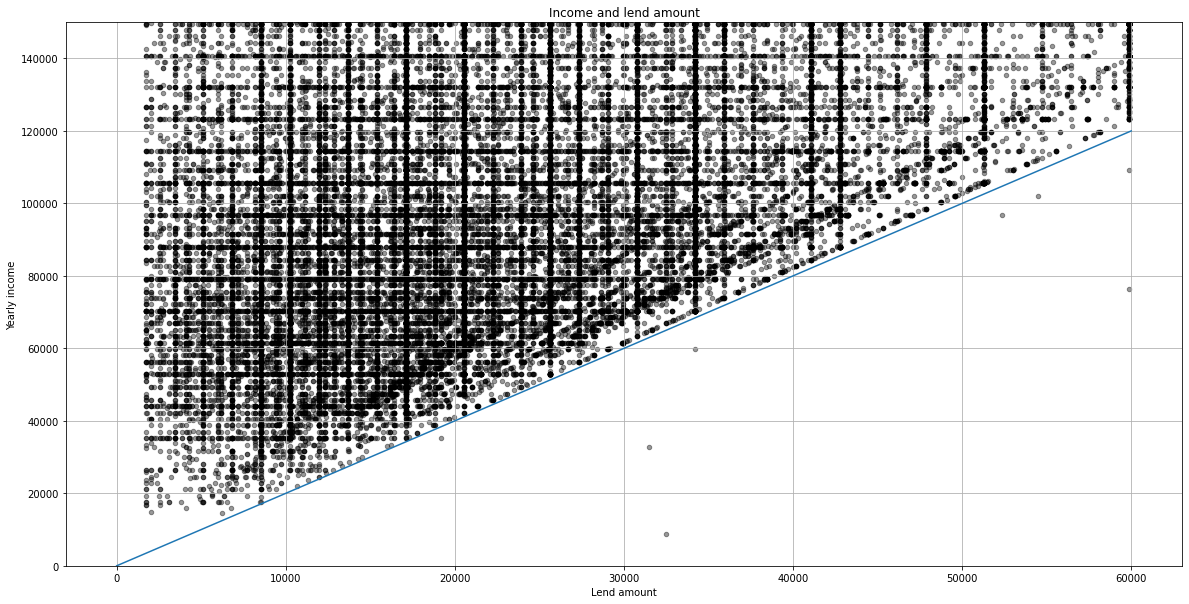

In [7]:
ax = df.plot.scatter(x='Lend_Amount',
                     y='Yearly_Income',
                     figsize=(20, 10),
                     xlabel='Lend amount',
                     ylabel='Yearly income',
                     title='Income and lend amount',
                     alpha=0.4,
                     color='black',
                     grid=True
                     )
ax.set_yscale('linear')
ax.set_ylim([0, 15e4])

x = np.linspace(0, 6e4)
y = 2 * x
ax.plot(x, y)

In [8]:
# Outliers analysis
df1 = df[df.Yearly_Income < 2*df.Lend_Amount]
df1

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
8446,68671,6999174,III,>10yrs,Vfied,96800.0000,RENT,0,0,Court Reporter,...,whole,FL,9,8798.0,5 years,5513.04,debt consolidation,J,0.0,0
12440,118640,7275759,V,6yrs,Vfied,102080.0000,OWN,0,0,System Administrator,...,fully paid,HI,4,30710.0,5 years,32816.61,car,J,0.0,0
23552,83529,7116055,V,7yrs,Vfied,59854.0800,RENT,0,0,Appointment Center Rep,...,fully paid,OH,9,23074.0,5 years,15966.27,debt consolidation,J,0.0,0
35022,67999,6830862,VI,4yrs,Vfied,32686.7200,MORTGAGE,0,0,office manager,...,whole,IL,10,27224.0,5 years,15519.96,debt consolidation,J,0.0,0
38338,81926,6816938,V,>10yrs,Vfied,76268.1216,MORTGAGE,0,0,Shipping clerk,...,fully paid,CA,13,37018.0,5 years,16376.67,debt consolidation,J,0.0,0
42546,25601,6948402,IV,1yrs,Source Verified,8800.0000,MORTGAGE,0,0,Distributer,...,fully paid,TX,26,95284.0,5 years,32667.84,other,J,0.0,0
45358,39574,7126058,III,9yrs,Vfied,109120.0000,MORTGAGE,0,0,Warehouse Manager,...,fully paid,CA,8,48472.0,3 years,37645.65,debt consolidation,J,0.0,0
77042,116560,7273730,III,4yrs,Source Verified,35200.0000,RENT,1,0,Bus Driver,...,whole,AK,12,39508.0,3 years,20352.42,debt consolidation,J,0.0,0


### 5. Macierz korelacji

W celu ułatwienia wyboru zmiennych, jakie powinny być wziete pod uwagę w modelu, wygenerowano macierz konwolucji. Warto tu zauważyć, że zmienna 'Default', której klasyfikacji będziemy dokonywać jest zmienną binarną, przez co konwolucja nie za dobrze obrazuje jej zależność od innych zmiennych.

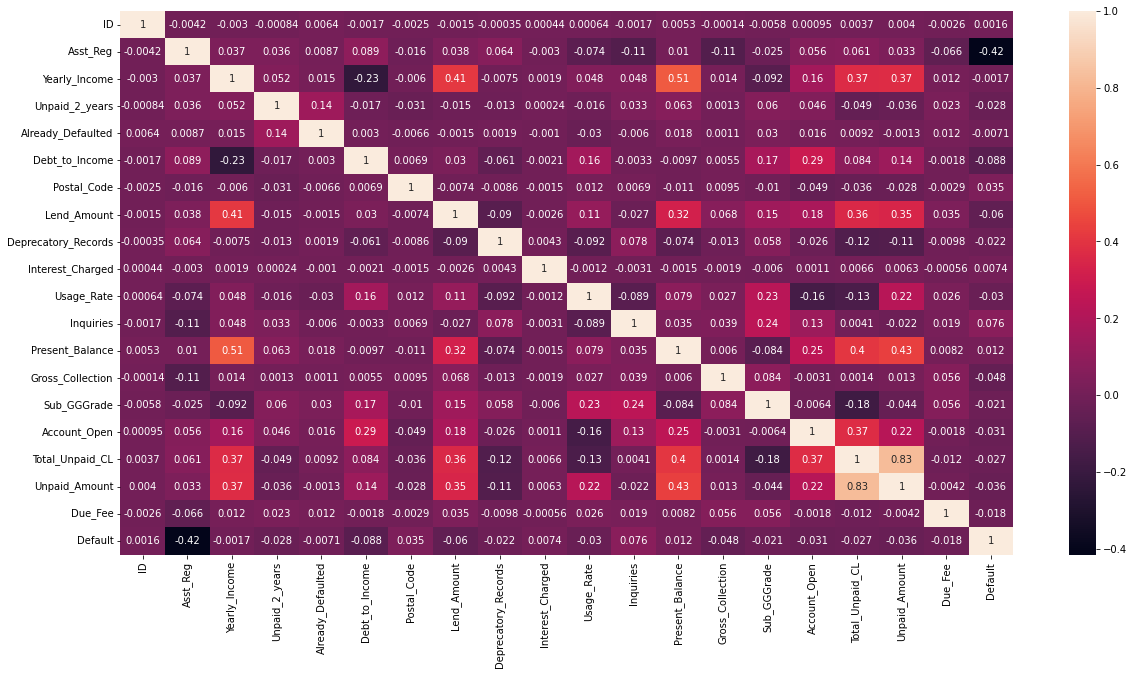

In [9]:
corr_matrix = df.corr()
plt.figure(figsize=(20,10))
sn.heatmap(corr_matrix, annot = True)
plt.show()

### 6. Budowa modelu i klasyfikacja

Do klasyfikacji zmiennej 'Default' postanowiono wykorzystać zmienne 'Yearly_Income', 'Lend_Amount', 'Unpaid_Amount', 'GGGrade', 'Experience', 'Home_Status' oraz 'Asst_Reg'. Ponieważ niektóre z nich nie są zmiennymi liczbowymi, w pierwszej kolejności zamieniono je do postaci, która pozwalała by na wykorzystanie ich w perceptronie. Następnie zaś dokonano normalizacji każdej z kolumn, tak aby ich zakres wartości mieścił się w przedziale [0, 1].

In [10]:
# Lista cech(column) branych pod uwagę w kontekscie oraz zamiana wartości na liczby.
feature_list = ['Yearly_Income', 'Lend_Amount', 'Unpaid_Amount',
                'GGGrade', 'Experience', 'Home_Status', 'Asst_Reg']
wanted_values = ['Default']
gggrade_vals = {'I': 0, 'II': 1, 'III': 2, 'IV': 3,
                'V': 4,'VI': 5, 'VII': 6}
exp_vals = {'<1yr': 0, '1yrs': 1, '2yrs': 2, '3yrs': 3,
            '4yrs': 4, '5yrs': 5, '6yrs': 6, '7yrs': 7,
            '8yrs': 8, '9yrs': 9,'10yrs': 10, '>10yrs': 11
}
hs_vals = {'MORTGAGE': 0, 'RENT': 1, 'OWN': 2, 'OTHER': 3, 'NONE': 4}

In [11]:

features_df = df[feature_list + wanted_values]

features_df = features_df.replace({'Experience': exp_vals})
features_df = features_df.replace({'GGGrade': gggrade_vals})
features_df = features_df.replace({'Home_Status': hs_vals})
features_df

,Yearly_Income,Lend_Amount,Unpaid_Amount,GGGrade,Experience,Home_Status,Asst_Reg,Default
0,633600.00,42023.25,31216.05,1,11,0,421802,0
1,85483.20,38133.00,11660.49,3,7,1,3964312,0
2,79200.00,17100.00,5637.87,2,0,1,4247560,0
3,61600.00,5130.00,15607.17,2,0,1,197179,1
4,68053.92,19665.00,27472.86,4,2,1,4646684,0
...,...,...,...,...,...,...,...,...
87494,246400.00,20520.00,10383.12,2,0,1,5409793,0
87495,75680.00,10260.00,10012.05,1,11,1,4535984,0
87496,90423.52,27360.00,24921.54,3,3,1,2624710,0
87497,91520.00,8550.00,14517.90,1,11,0,5966919,0


In [12]:
normalized_df=(features_df-features_df.min()) / (features_df.max()-features_df.min())
normalized_df

,Yearly_Income,Lend_Amount,Unpaid_Amount,GGGrade,Experience,Home_Status,Asst_Reg,Default
0,0.118531,0.693382,0.023317,0.166667,1.000000,0.00,0.054177,0.0
1,0.014548,0.626471,0.008710,0.500000,0.636364,0.25,0.537664,0.0
2,0.013356,0.264706,0.004211,0.333333,0.000000,0.25,0.576322,0.0
3,0.010017,0.058824,0.011658,0.333333,0.000000,0.25,0.023520,1.0
4,0.011241,0.308824,0.020521,0.666667,0.181818,0.25,0.630795,0.0
...,...,...,...,...,...,...,...,...
87494,0.045075,0.323529,0.007756,0.333333,0.000000,0.25,0.734946,0.0
87495,0.012688,0.147059,0.007479,0.166667,1.000000,0.25,0.615687,0.0
87496,0.015485,0.441176,0.018615,0.500000,0.272727,0.25,0.354833,0.0
87497,0.015693,0.117647,0.010844,0.166667,1.000000,0.00,0.810983,0.0


Mając przygotowany zbiór, który zostanie użyty do uczenia modelu, który wykonywać klasyfikację zmiennej 'Default', w następnym kroku zbudowano model oraz wybrano, jakie metryki zostaną użyte do walidacji jego dobroci. Wybrano następujące metryki:
* Accuracy (dokładność) - stosunek poprawnych klasyfikacji do ogólnej liczby klasyfikacji
* False Negatives (Fałszywie Ujemna) - liczba klasyfikacji negatywnych, których prawdziwą wartością jest stan pozytywny
* False Positives (Fałszywie Dodania) - liczba klasyfikacji pozytywnych, których prawdziwą wartością jest stan negatywny
* True Positives (Prawdziwie Dodatnia) - liczba klasyfikacji pozytywnych, których prawdziwą wartością jest stan pozytywny
* True Negatives (Prawdziwie Ujemna) - liczba klasyfikacji negatywnych, których prawdziwą wartością jest stan negatywny
* Precision (Precyzja) - stosunek liczby klasyfikacji Prawdziwie Dodatnich (TP) do sumy klasyfikacji Prawdziwie Dodatnich (TP) i Fałszywie Dodatnich (FP)
* Recall (Zwrot) - stosunek liczby klasyfikacji Prawdziwie Dodatnich (TP) do sumy klasyfikacji Prawdziwie Dodatnich (TP) i Fałszywie Ujemnych (FN)

In [13]:
metrics_used = [
    'accuracy',
    metrics.FalseNegatives(),
    metrics.FalsePositives(),
    metrics.TruePositives(),
    metrics.TrueNegatives(),
    metrics.Precision(),
    metrics.Recall()
]

Do klasyfikacji użyto perceptronu wielowarstwowego, składającego się z dwóch warstw ukrytych mających 16 oraz 9 neuronów. Zbiór danych podzielono na zbiór treningowy oraz zbiór testowy, gdzie pierwsze 80% całego zbioru zostało uznane za zbiór treningowy, a pozostała część za zbiór testowy.

In [14]:
inputs = normalized_df[feature_list].values
outputs = normalized_df[wanted_values].values

n_values = len(inputs)
train_dataset_size = int(n_values - 0.2 * n_values)

In [15]:
x_train = inputs[:train_dataset_size]
x_test = inputs[train_dataset_size:]

y_train = outputs[:train_dataset_size]
y_test = outputs[train_dataset_size:]

In [16]:
perceptron = Sequential()

perceptron.add(Dense(16, input_shape=(7, ), activation='relu'))
perceptron.add(Dropout(0.2))

perceptron.add(Dense(9, activation='relu'))
perceptron.add(Dropout(0.2))

perceptron.add(Dense(1, activation='sigmoid'))

perceptron.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=metrics_used)
perceptron.fit(x_train,
               y_train,
               epochs=100,
               shuffle=True,
               use_multiprocessing=True)

Epoch 62/100
1713/1713 [==============================] - 3s 2ms/step - loss: 0.3884 - accuracy: 0.8276 - false_negatives: 8448.0000 - false_positives: 1001.0000 - true_positives: 1974.0000 - true_negatives: 43381.0000 - precision: 0.6635 - recall: 0.1894
Epoch 63/100
1713/1713 [==============================] - 3s 2ms/step - loss: 0.3892 - accuracy: 0.8271 - false_negatives: 8476.0000 - false_positives: 997.0000 - true_positives: 1946.0000 - true_negatives: 43385.0000 - precision: 0.6612 - recall: 0.1867
Epoch 64/100
1713/1713 [==============================] - 3s 2ms/step - loss: 0.3896 - accuracy: 0.8265 - false_negatives: 8504.0000 - false_positives: 1004.0000 - true_positives: 1918.0000 - true_negatives: 43378.0000 - precision: 0.6564 - recall: 0.1840
Epoch 65/100
1713/1713 [==============================] - 3s 2ms/step - loss: 0.3891 - accuracy: 0.8266 - false_negatives: 8537.0000 - false_positives: 968.0000 - true_positives: 1885.0000 - true_negatives: 43414.0000 - precision: 0.

In [17]:
out = perceptron.evaluate(x_test, y_test)

print(f'\nLoss: {out[0]}')
print(f'Accuracy: {out[1]}')
print(f'FN: {out[2]}')
print(f'FP: {out[3]}')
print(f'TP: {out[4]}')
print(f'TN: {out[5]}')
print(f'Precision: {out[6]}')
print(f'Recall: {out[7]}')

429/429 [==============================] - 1s 1ms/step - loss: 0.3747 - accuracy: 0.8350 - false_negatives: 2055.0000 - false_positives: 205.0000 - true_positives: 461.0000 - true_negatives: 10980.0000 - precision: 0.6922 - recall: 0.1832

Loss: 0.3746717572212219
Accuracy: 0.8350485563278198
FN: 2055.0
FP: 205.0
TP: 461.0
TN: 10980.0
Precision: 0.6921921968460083
Recall: 0.18322734534740448


### 7. Tablica pomyłek i wskaźnik F1

W celu oceny jakości stworzonego modelu w pierwszej kolejności wygenerowano tablicę pomyłek, przedstawiającą relację poprawnych i niepoprawnych klasyfikacji do rzeczywistych stanów zmiennej.

Następnie wygenerowano tzw. wskaźnik F1 , czyli średnią harmoniczną Precyzji oraz Zwrotu. Im wartość wskaźnika F1 jest bliższa wartości 1, tym lepszy jest model. Wartość zerowa wskaźnika z kolei oznacza, że kompletnie nie nadaje się on do klasyfikacji zmiennej. 

Precision = 0.6921921968460083
Recall = 0.18322734534740448

F1 Score = 0.2897548720022999


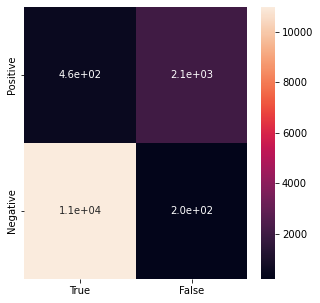

In [18]:
conf_mat = [[out[4], out[2]],
            [out[5], out[3]]]
cm_df = pd.DataFrame(conf_mat,
                     columns=['True', 'False'],
                     index=['Positive', 'Negative'])
plt.figure(figsize=(5, 5))
cm = sn.heatmap(cm_df, annot=True)

def f1_score(prec, rec):
    return 2*((prec*rec)/(prec+rec))

precision = out[-2]
recall = out[-1]

print(f'Precision = {precision}')
print(f'Recall = {recall}')
print(f'\nF1 Score = {f1_score(precision, recall)}')